In [1]:
# %load nbinit.py
# Initialize stuff
import matplotlib
matplotlib.use('nbagg')

import numpy as np
from functools import partial

from xraycam import camcontrol
from xraycam.camcontrol import plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def runset_and_merge(run_prefix, number_runs, run = False, threshold_min = 31, threshold_max =  55, **kwargs):
    """Returns a Frame"""
    runset = camcontrol.RunSet(run_prefix= run_prefix,
        run = run, number_runs = number_runs, **kwargs)
    return runset.filter_reduce_frames(threshold_min = threshold_min, threshold_max = threshold_max)

def runset_merge_plot(*args, rebin = 10, **kwargs):
    frame = runset_and_merge(*args, **kwargs)
    return frame, frame.plot_lineout(rebin = rebin)

def lineout_subregion(frame, cutoff, rebin = 4, error_bars = True, **kwargs):
    """Plot a lineout using the lower `cutoff` rows of the frame"""
    import copy
    nframe = copy.deepcopy(frame)
    nframe.data = nframe.data[len(frame.data) - cutoff:, :]
    return nframe.plot_lineout(rebin = rebin, error_bars = error_bars)


In [8]:
frame1.plot_lineout(error_bars=False,rebin=10)
plt.show()

In [9]:
frame1 = runset_and_merge('data/6.7.data1', 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)

In [10]:
frame1.plot_lineout(error_bars=False,rebin=10)
plt.show()

In [51]:
frame7 = runset_and_merge('data/6.7.data7', 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)

In [43]:
framelist = [runset_and_merge('data/6.7.data%d'%i, 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158) for i in (1,7,8)]
[x.plot_lineout(error_bars=True,rebin=10) for x in framelist]
plt.show()

In [39]:
framesum=framelist[0]+framelist[1]+framelist[2]

In [40]:
framesum.plot_lineout(error_bars=False,rebin=8)
plt.show()

In [195]:
frame7 = runset_and_merge('data/6.7.data7', 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)
energyframe0 = runset_and_merge('data/6.7.energystudy0', 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)
energyframe1 = runset_and_merge('data/6.7.energystudy1', 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)
energyframe2 = runset_and_merge('data/6.7.energystudy2', 6, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)
energyframe3 = runset_and_merge('data/6.7.energystudy3', 2, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)
energyframe4 = runset_and_merge('data/6.7.energystudy4', 2, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)
energyframe5 = runset_and_merge('data/6.7.energystudy5', 1, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)

In [196]:
[x.plot_lineout(error_bars=False,rebin=10) for x in (frame7,energyframe0,energyframe1,energyframe2,energyframe3,energyframe4,energyframe5)]
plt.show()

In [197]:
[plt.plot(x.get_lineout(rebin=10)[1]/(x.numExposures)) for x in (frame7,energyframe0,energyframe1,energyframe2,energyframe3,energyframe4,energyframe5)]
plt.show()

In [199]:
[print(x.numExposures) for x in(frame7,energyframe0,energyframe1,energyframe2,energyframe3,energyframe4,energyframe5)]

15000
15000
15000
15000
5000
5000
2500


[None, None, None, None, None, None, None]

In [198]:
[plt.plot(x.get_lineout(rebin=10)[1]/max(x.get_lineout(rebin=10)[1])) for x in (frame7,energyframe0,energyframe1,energyframe2,energyframe3,energyframe4,energyframe5)]
plt.show()

In [161]:
l=[x.get_lineout(rebin=5)[1][30]/x.get_lineout(rebin=5)[1][50:70] for x in (frame7,energyframe0,energyframe1,energyframe2,energyframe3,energyframe4,energyframe5)]
[np.mean(i) for i in l]

[0.19864964381205344,
 0.20242309620428495,
 0.21070621805142645,
 0.21650713907601352,
 0.23321378243313445,
 0.24163803896277672,
 0.24869874752378646]

In [262]:
plt.plot(energyframe2.get_lineout(rebin=10)[1])
plt.show()

In [265]:
sum(energyframe2.get_lineout(rebin=10)[1][20:40])/140/energyframe2.numExposures*8

41.254232380952381

In [267]:
plt.plot([max(x.get_lineout(rebin=10)[1]/(x.numExposures)) for x in (frame7,energyframe0,energyframe1,energyframe2,energyframe3,energyframe4,energyframe5)])
plt.show()

# Long Exposure Results

In [2]:
longframe0 = runset_and_merge('data/6.7.longframe0', 58, gain = '0x3f',
        numExposures = 2500, run = False, window_min = 100, window_max = 158,
        threshold_min = 100, threshold_max = 158)

In [14]:
longframe0.plot_lineout(error_bars=False,rebin=5)
plt.show()

In [4]:
plt.plot(longframe0.get_lineout(rebin=5)[0],longframe0.get_lineout(rebin=5)[1]/140/longframe0.numExposures*8)
plt.show()

In [12]:
plt.plot(longframe0.get_lineout(rebin=5)[0],longframe0.get_lineout(rebin=5)[1]/140)
plt.show()

<IPython.core.display.Javascript object>


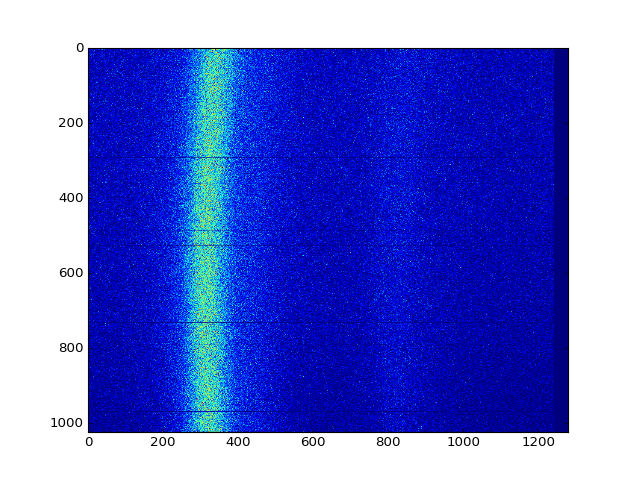

In [23]:
longframe0.show(vmax=2000)

## Plot Histogram

In [223]:
longrun=camcontrol.RunSet(run_prefix='data/6.7.longframe0',
        run = False, number_runs = 5)

In [229]:
datarun1=longrun.get_dataruns()[1]

<IPython.core.display.Javascript object>


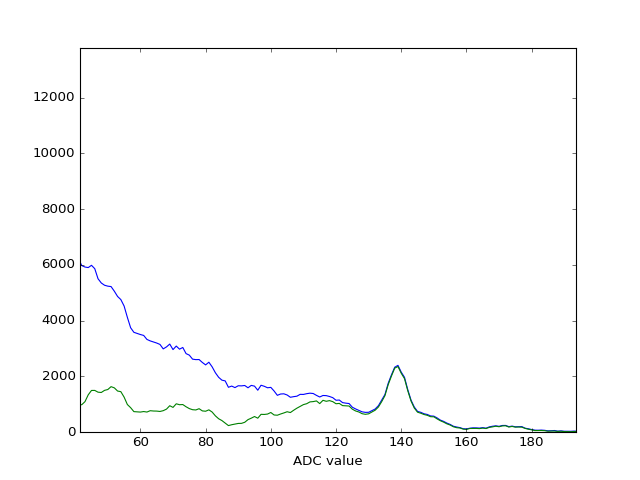

In [240]:
datarun1.plot_histograms(calibrate=False)

#### \*\*\*\* Below is code that fixed plt temporarily to allow the histogram to be plotted \*\*\*\*

In [232]:
import matplotlib.pyplot as plt

In [236]:
camcontrol.plt = plt

In [243]:
from importlib import reload

In [245]:
from xraycam.mpl_plotly import plt

In [247]:
camcontrol.plt = plt

In [244]:
reload(plt)

<module 'matplotlib.pyplot' from '/home/william/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

#### \*\*\*\* End  \*\*\*\*